#Models#

This part is focused on building and evaluating machine learning models for medical data analysis.


**On this part we will do:**

* Data Import: The code imports necessary libraries and loads two datasets - one with encoded features and another without encoding.

* Imbalance Check: It checks for class imbalance in the 'target' variable of the encoded dataset.

* Data Resampling: To address the class imbalance, the code applies Synthetic Minority Over-sampling Technique (SMOTE) oversampling to the encoded dataset. For the non-encoded dataset, categorical features are handled and SMOTENC oversampling is applied.

* Model Training and Evaluation: Three classification models are trained and evaluated on both datasets - Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier. Evaluation includes metrics like accuracy, precision, recall, and F1-score. ROC curves and confusion matrices are also generated.

* Feature Importance Analysis: For each model, a feature importance analysis is performed and visualized to identify the most important features.

**The input files:**

* csv with the target encoded data

* csv with the one hot encoded data

* csv with the data


Import the libreries

In [ ]:
pip install catboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt  # For ROC curve visualization
from catboost import CatBoostClassifier

Import the data

In [ ]:
df_encoded = pd.read_csv('all_patient_data_encoded.csv', index_col=0)

In [ ]:
df_dummies = pd.read_csv('df_encoded_dummies.csv', index_col=0)

#Check imbalance in dataset

In [ ]:
class_counts = df_encoded['target'].value_counts()
print(class_counts)



1    8984
0    5974
Name: target, dtype: int64


In [ ]:
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Imbalance Ratio: 0.66



An imbalance ratio of **0.66** indicates that the majority class is smaller in size compared to the minority class. Specifically, it means that the size of the majority class is approximately 0.66 times (or about two-thirds) the size of the minority class.

In order to deal with it we tried to do resampling.


**Oversampling** involves creating additional copies of instances from the minority class to balance the class distribution. One common oversampling technique is called Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic data points by interpolating between existing minority class samples.

We tried also to do **undersample** but the result were beter this way.

**Oversampling on the encoded data**

In [ ]:
# Separate the target variable
X = df_encoded.drop(columns=['target','Not_ID'])
y = df_encoded['target']

 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SMOTE object
smote = SMOTE(random_state=42)
# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

##############undersampling#########

# Initialize the RandomUnderSampler object
#undersampler = RandomUnderSampler(random_state=42)
# Apply undersampling to the training data
#X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

**Oversampling on the one hot encoded data**

In [ ]:
# Separate the target variable
X_dummies = df_dummies.drop(columns=['target','Not_ID'])
y_dummies = df_dummies['target']

 # Split the data into training and testing sets
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(X_dummies, y_dummies, test_size=0.2, random_state=42)

# Initialize the SMOTE object
smote = SMOTE(random_state=42)
# Apply SMOTE to the training data
X_resampled_dummies, y_resampled_dummies = smote.fit_resample(X_train_dummies, y_train_dummies)


#Define the df for the result

In [ ]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Data','Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

#Applying the models#

##creating the functions for the models

In [ ]:
# Function to train and evaluate a Logistic Regression model
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model_lg = LogisticRegression(max_iter=10000)
    model_lg.fit(X_train, y_train)
    y_pred = model_lg.predict(X_test)
    return y_pred , model_lg

# Function to evaluate a model and display performance metrics
def evaluate_model(data,model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    # Append the results to the DataFrame
    results.loc[len(results)] = [data,model_name, accuracy, precision, recall, f1]



In [ ]:
# Function to train a Random Forest Classifier model
def train_random_forest(X_train, y_train):
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)
    return model_rf

# Function to evaluate a model and display performance metrics
def evaluate_random_forest(data, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Random Forest Classifier Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    # Append the results to the DataFrame
    results.loc[len(results)] = [data,model, accuracy, precision, recall, f1]

In [ ]:
# Function to train a Gradient Boosting Classifier model
def train_gradient_boosting(X_train, y_train):
    model_gb = GradientBoostingClassifier()
    model_gb.fit(X_train, y_train)
    return model_gb

# Function to evaluate a model and display performance metrics
def evaluate_gradient_boosting(data, model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Gradient Boosting Classifier Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    # Append the results to the DataFrame
    results.loc[len(results)] = [data,model, accuracy, precision, recall, f1]

In [ ]:
# Function to train a CatBoost model
def train_catboost(X_train, y_train, iterations=1000, depth=6, learning_rate=0.1):
    model_catboost = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate, verbose=0)
    model_catboost.fit(X_train, y_train)
    return model_catboost

# Function to evaluate a CatBoost model and display performance metrics
def evaluate_catboost(data, model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("CatBoost Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # Append the results to the DataFrame
    results.loc[len(results)] = [data, "CatBoost Model", accuracy, precision, recall, f1]

In [ ]:
# function to visualize the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
#calculates the predicted probabilities using the model and proceeds to plot the ROC curve and calculate the AUC-ROC score
def plot_roc_curve(model, X_test, y_true):
    y_prob = model.predict_proba(X_test)[:, 1]  # Calculate predicted probabilities for class 1
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
def feature_importance_analysis(model, X_train, title):
    feature_importances = model.feature_importances_
    feature_importances = feature_importances / feature_importances.sum()  # Normalize
    feature_names = X_train.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()



def feature_importance_analysis_logistic_regression(model, X_train, title):
    # For Logistic Regression, feature importance isn't directly available
    # we will use the absolute coefficients as a measure of feature importance
    feature_importances = abs(model.coef_[0])
    feature_importances = feature_importances / feature_importances.sum()  # Normalize
    feature_names = X_train.columns

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()


##**Target encoded data**##

**The first model -  Logistic Regression model**

In [ ]:
if __name__ == "__main__":
    # Train and evaluate Logistic Regression
    lr_y_pred , model_lg = train_logistic_regression(X_resampled, y_resampled, X_test, y_test)
    evaluate_model("encoded","Logistic Regression", y_test, lr_y_pred)

Model: Logistic Regression
Accuracy: 0.80
Precision: 0.81
Recall: 0.89
F1 Score: 0.85




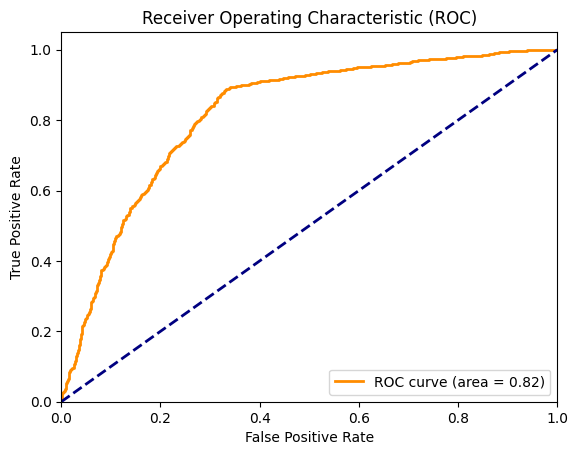

In [ ]:
plot_roc_curve(model_lg, X_test,y_test)

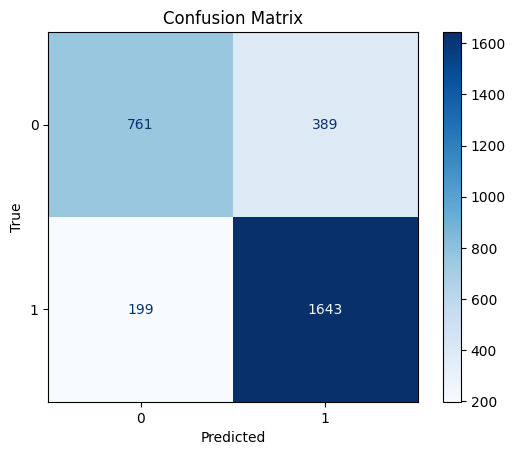

In [ ]:
plot_confusion_matrix(y_test, lr_y_pred,[0,1])

without using (max_iter=1000) the result were:
Model: Logistic Regression

Accuracy: 0.63

Precision: 0.76

Recall: 0.59

F1 Score: 0.66


**The second model - Random Forest Classifier**

In [ ]:
if __name__ == "__main__":
    # Train the Random Forest model
    rf_model = train_random_forest(X_resampled, y_resampled)
    # Evaluate the Random Forest model
    evaluate_random_forest("encoded",rf_model, X_test, y_test)

Random Forest Classifier Evaluation:
Accuracy: 0.80
Precision: 0.81
Recall: 0.88
F1 Score: 0.85




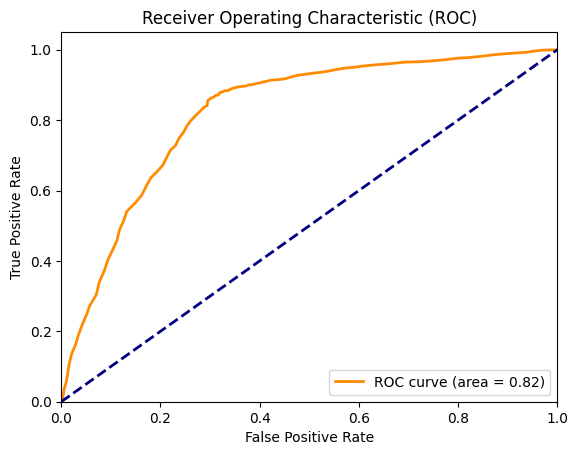

In [ ]:
plot_roc_curve(rf_model, X_test,y_test)

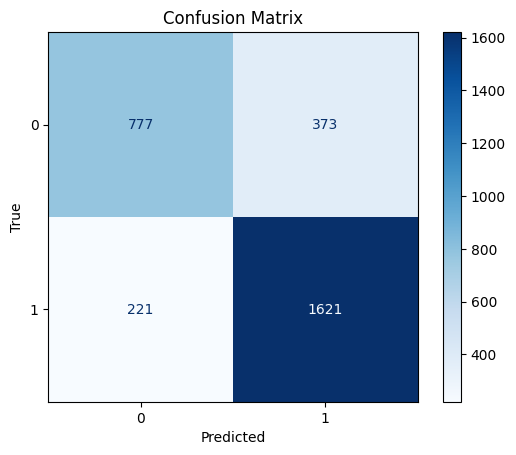

In [ ]:
plot_confusion_matrix(y_test, rf_model.predict(X_test),[0,1])

**The third model - Gradient Boosting Classifier model**

In [ ]:
if __name__ == "__main__":
    # Train the Gradient Boosting model
    gb_model = train_gradient_boosting(X_resampled, y_resampled)

    # Evaluate the Gradient Boosting model
    evaluate_gradient_boosting("encoded",gb_model, X_test, y_test)

Gradient Boosting Classifier Evaluation:
Accuracy: 0.80
Precision: 0.81
Recall: 0.89
F1 Score: 0.85




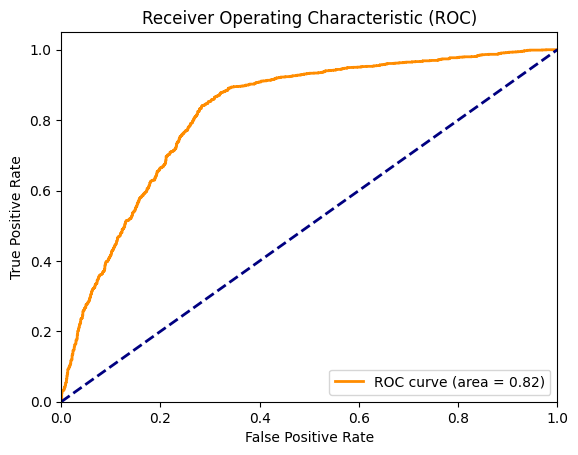

In [ ]:
plot_roc_curve(gb_model, X_test,y_test)

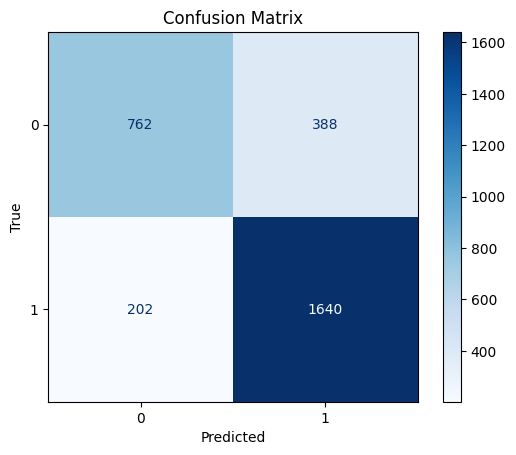

In [ ]:
plot_confusion_matrix(y_test, gb_model.predict(X_test),[0,1])

**The fourth model**

In [ ]:
if __name__ == "__main__":
    # Train a CatBoost model
    model_catboost = train_catboost(X_resampled, y_resampled)
    # Evaluate the CatBoost model
    evaluate_catboost("encoded",model_catboost, X_test, y_test)

CatBoost Model Evaluation:
Accuracy: 0.79
Precision: 0.81
Recall: 0.87
F1 Score: 0.84


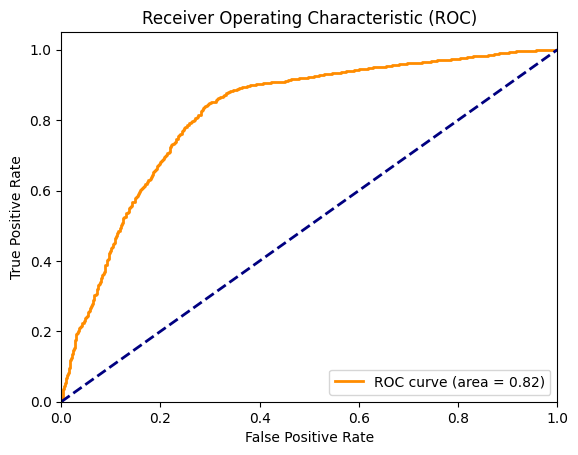

In [ ]:
plot_roc_curve(model_catboost, X_test,y_test)

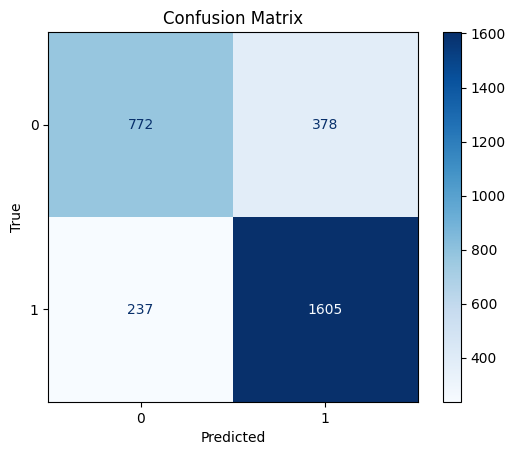

In [ ]:
plot_confusion_matrix(y_test, model_catboost.predict(X_test),[0,1])

**Feature Importance Analysis**

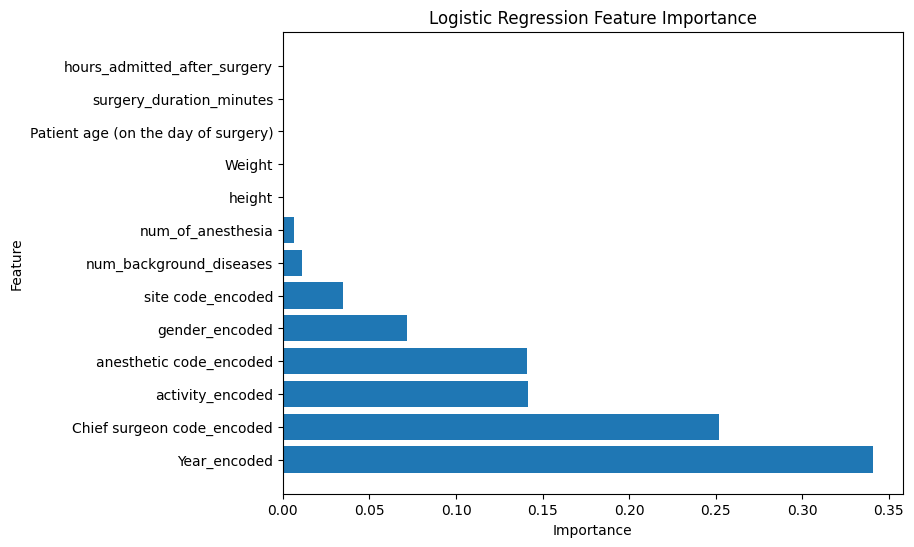

In [ ]:
# Perform feature importance analysis for Logistic Regression
feature_importance_analysis_logistic_regression(model_lg, X_resampled, 'Logistic Regression Feature Importance')

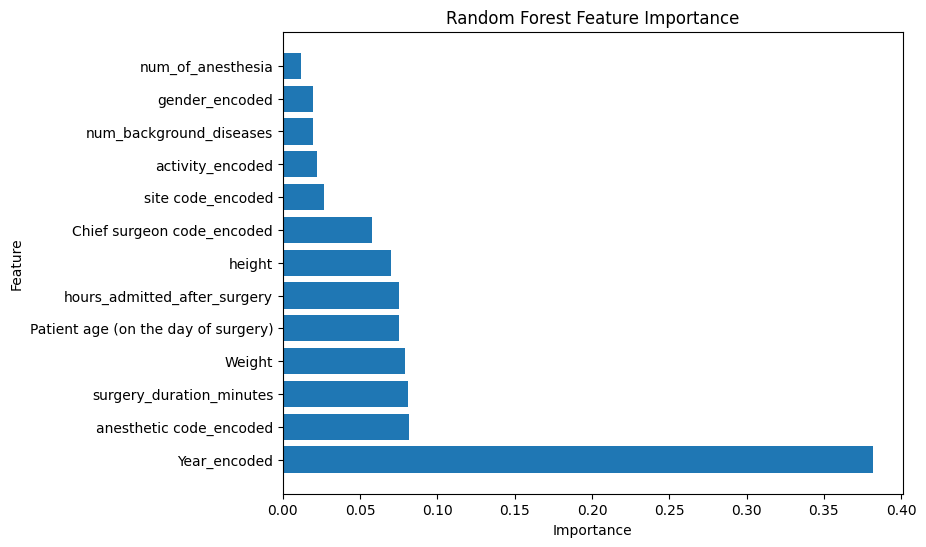

In [ ]:
#  perform feature importance analysis for Random Forest
feature_importance_analysis(rf_model, X_resampled, 'Random Forest Feature Importance')

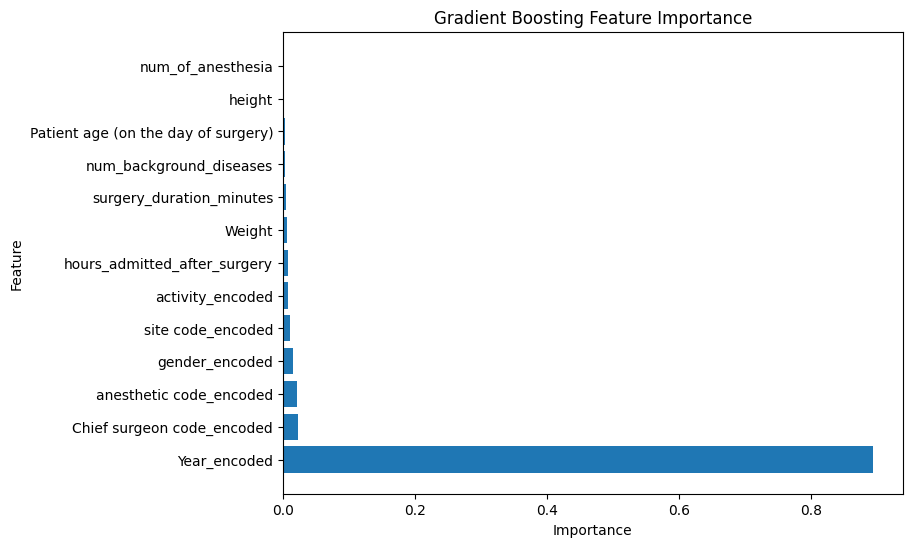

In [ ]:
# perform feature importance analysis for Gradient Boosting
feature_importance_analysis(gb_model, X_resampled, 'Gradient Boosting Feature Importance')

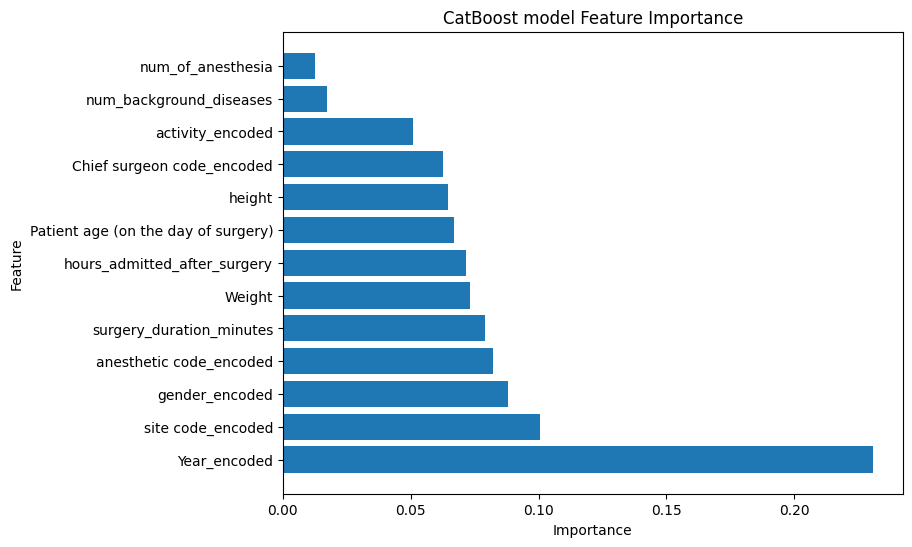

In [ ]:
# perform feature importance analysis for Catboost
feature_importance_analysis(model_catboost, X_resampled, 'CatBoost model Feature Importance')

##**One hot encoded data - dummies**##

**The first model -  Logistic Regression model**

In [ ]:
if __name__ == "__main__":
    # Train and evaluate Logistic Regression
    lr_y_pred_dummies , model_lg_dummies = train_logistic_regression(X_resampled_dummies, y_resampled_dummies, X_test_dummies, y_test_dummies)
    evaluate_model("dummies","Logistic Regression ", y_test_dummies, lr_y_pred_dummies)

Model: Logistic Regression 
Accuracy: 0.80
Precision: 0.81
Recall: 0.89
F1 Score: 0.85




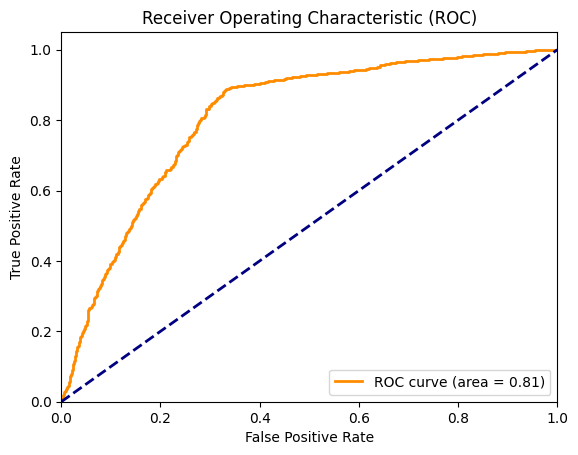

In [ ]:
plot_roc_curve(model_lg_dummies, X_test_dummies,y_test_dummies)

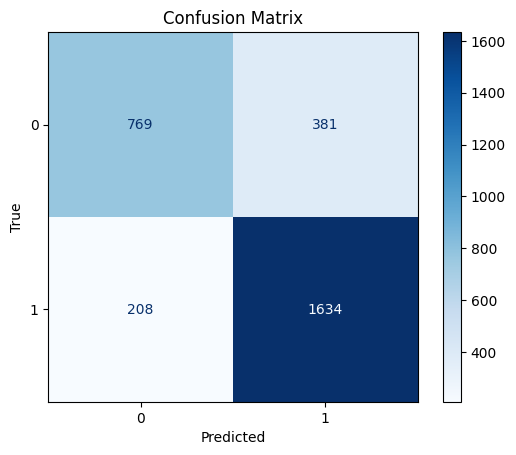

In [ ]:
plot_confusion_matrix(y_test_dummies, lr_y_pred_dummies,[0,1])

**The second model - Random Forest Classifier**

In [ ]:
if __name__ == "__main__":
    # Train the Random Forest model
    rf_model_dummies = train_random_forest(X_resampled_dummies, y_resampled_dummies)
    # Evaluate the Random Forest model
    evaluate_random_forest("dummies",rf_model_dummies, X_test_dummies, y_test_dummies)

Random Forest Classifier Evaluation:
Accuracy: 0.79
Precision: 0.81
Recall: 0.87
F1 Score: 0.84




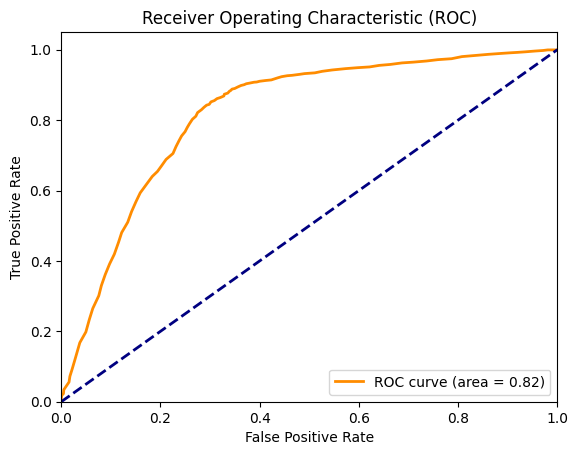

In [ ]:
plot_roc_curve(rf_model_dummies, X_test_dummies,y_test_dummies)

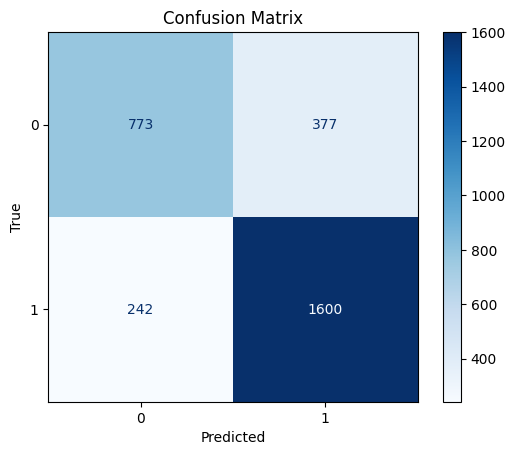

In [ ]:
plot_confusion_matrix(y_test_dummies, rf_model_dummies.predict(X_test_dummies),[0,1])

**The third model - Gradient Boosting Classifier model**

In [ ]:
if __name__ == "__main__":
    # Train the Gradient Boosting model
    gb_model_dummies = train_gradient_boosting(X_resampled_dummies, y_resampled_dummies)

    # Evaluate the Gradient Boosting model
    evaluate_gradient_boosting("dummies",gb_model_dummies, X_test_dummies, y_test_dummies)

Gradient Boosting Classifier Evaluation:
Accuracy: 0.80
Precision: 0.81
Recall: 0.89
F1 Score: 0.85




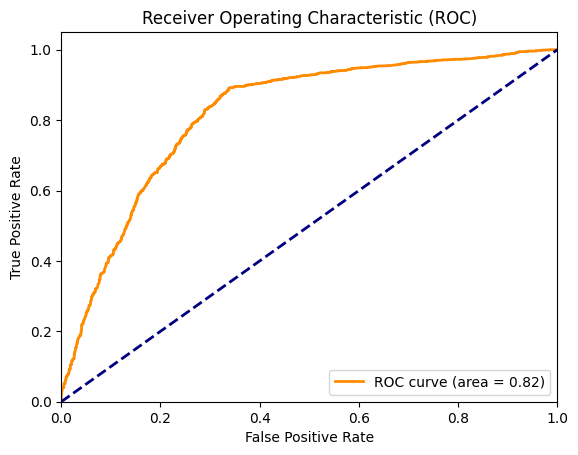

In [ ]:
plot_roc_curve(gb_model_dummies, X_test_dummies,y_test_dummies)

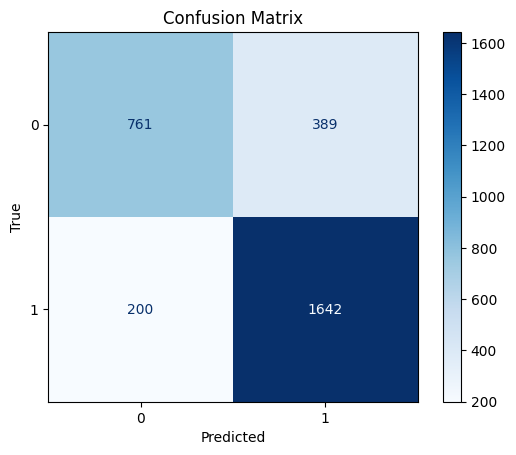

In [ ]:
plot_confusion_matrix(y_test_dummies, gb_model_dummies.predict(X_test_dummies),[0,1])

**The fourth model**

In [ ]:
if __name__ == "__main__":
    # Train a CatBoost model
    model_catboost_dummies = train_catboost(X_resampled_dummies, y_resampled_dummies)
    # Evaluate the CatBoost model
    evaluate_catboost("dummies",model_catboost_dummies, X_test_dummies, y_test_dummies)

CatBoost Model Evaluation:
Accuracy: 0.80
Precision: 0.81
Recall: 0.87
F1 Score: 0.84


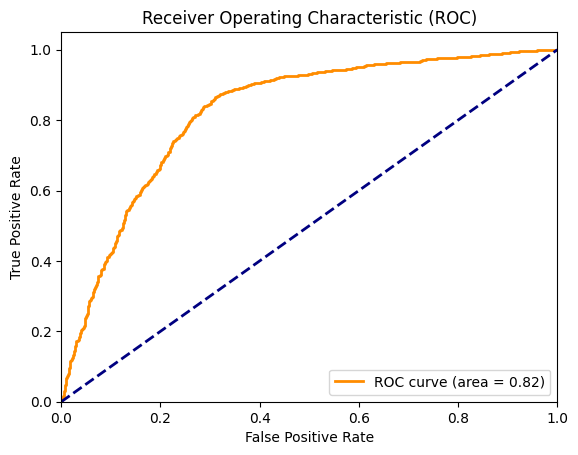

In [ ]:
plot_roc_curve(model_catboost_dummies, X_test_dummies,y_test_dummies)

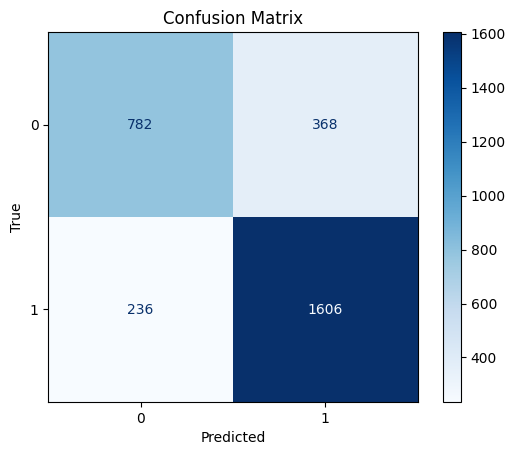

In [ ]:
plot_confusion_matrix(y_test_dummies, model_catboost_dummies.predict(X_test_dummies),[0,1])

**Feature Importance Analysis**

In [ ]:
def feature_importance_analysis(model, X_train, title):
    # Extract feature importances
    feature_importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else abs(model.coef_[0])
    feature_names = X_train.columns

    # Non-encoded columns
    non_encoded_columns = ['height', 'Weight', 'num_of_anesthesia', 'Patient age (on the day of surgery)',
                           'hours_admitted_after_surgery', 'num_background_diseases', 'surgery_duration_minutes']

    # Categorical columns
    categorical_columns = ['site code', 'activity', 'Chief surgeon code', 'anesthetic code', 'Year', 'gender']

    # Map feature importances to original column names
    original_feature_importances = {}

    # Include importance for non-encoded columns
    for column in non_encoded_columns:
        original_feature_importances[column] = feature_importances[feature_names.get_loc(column)]

    # Aggregate importance for categorical columns
    for original_feature in categorical_columns:
        one_hot_columns = [col for col in feature_names if col.startswith(original_feature)]
        importance_sum = sum(feature_importances[feature_names.get_loc(col)] for col in one_hot_columns)
        original_feature_importances[original_feature] = importance_sum

    # Normalize feature importances
    total_importance = sum(original_feature_importances.values())
    original_feature_importances = {k: v / total_importance for k, v in original_feature_importances.items()}

    # Create DataFrame for visualization
    importance_df = pd.DataFrame(list(original_feature_importances.items()), columns=['Feature', 'Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.legend()
    plt.show()


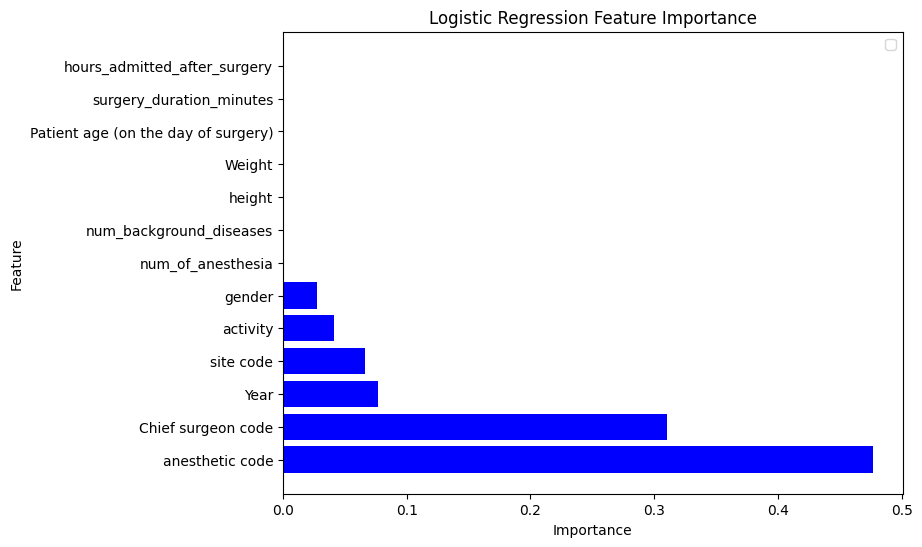

In [ ]:
# Perform feature importance analysis for Logistic Regression
feature_importance_analysis(model_lg_dummies, X_resampled_dummies, 'Logistic Regression Feature Importance')

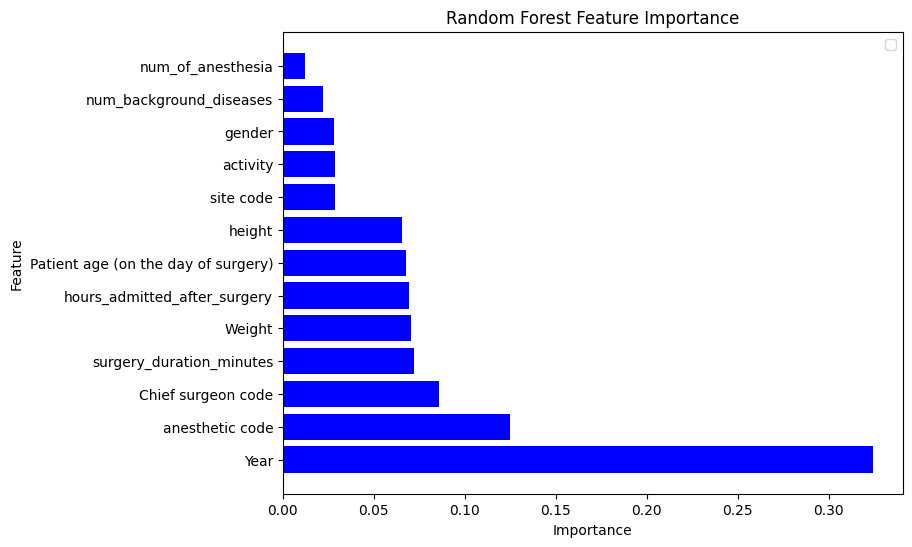

In [ ]:
#  perform feature importance analysis for Random Forest
feature_importance_analysis(rf_model_dummies, X_resampled_dummies, 'Random Forest Feature Importance')

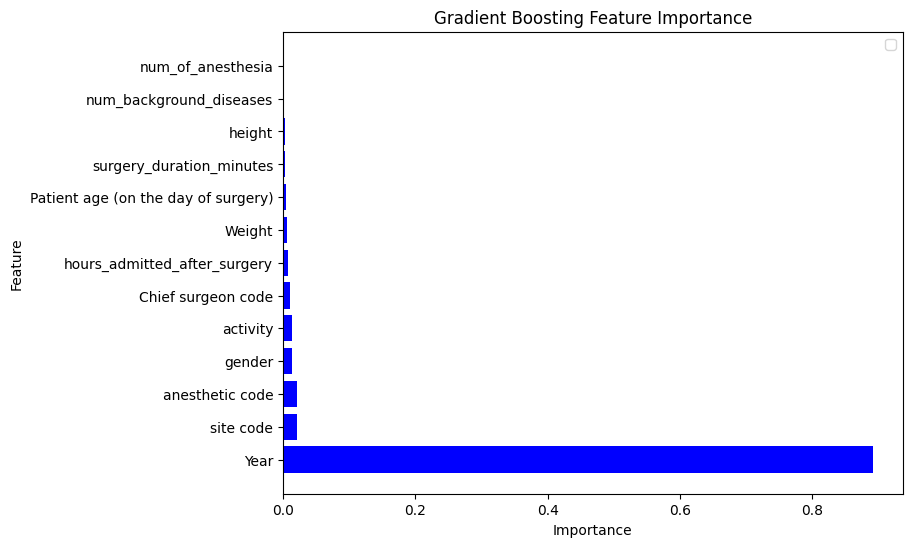

In [ ]:
# perform feature importance analysis for Gradient Boosting
feature_importance_analysis(gb_model_dummies, X_resampled_dummies, 'Gradient Boosting Feature Importance')

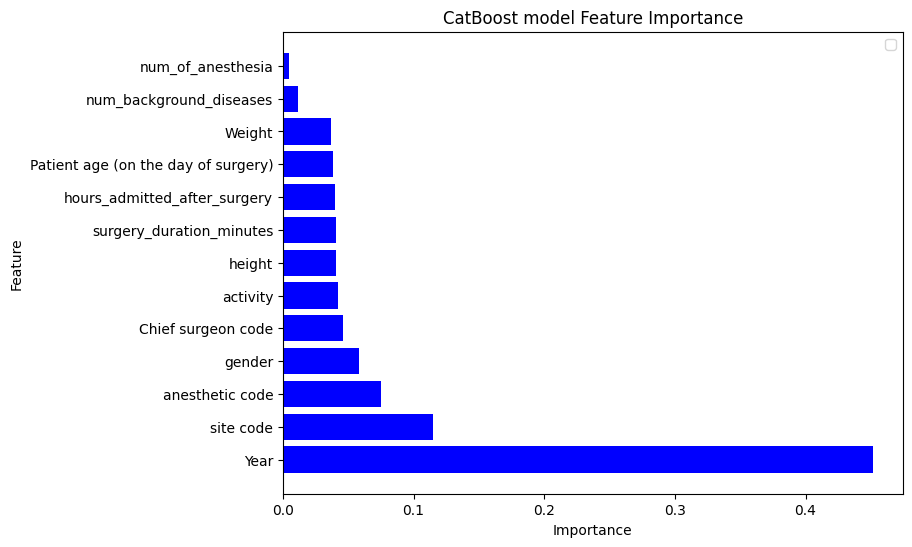

In [ ]:
# perform feature importance analysis for GCatBoost model
feature_importance_analysis(model_catboost_dummies, X_resampled_dummies, 'CatBoost model Feature Importance')

#Results

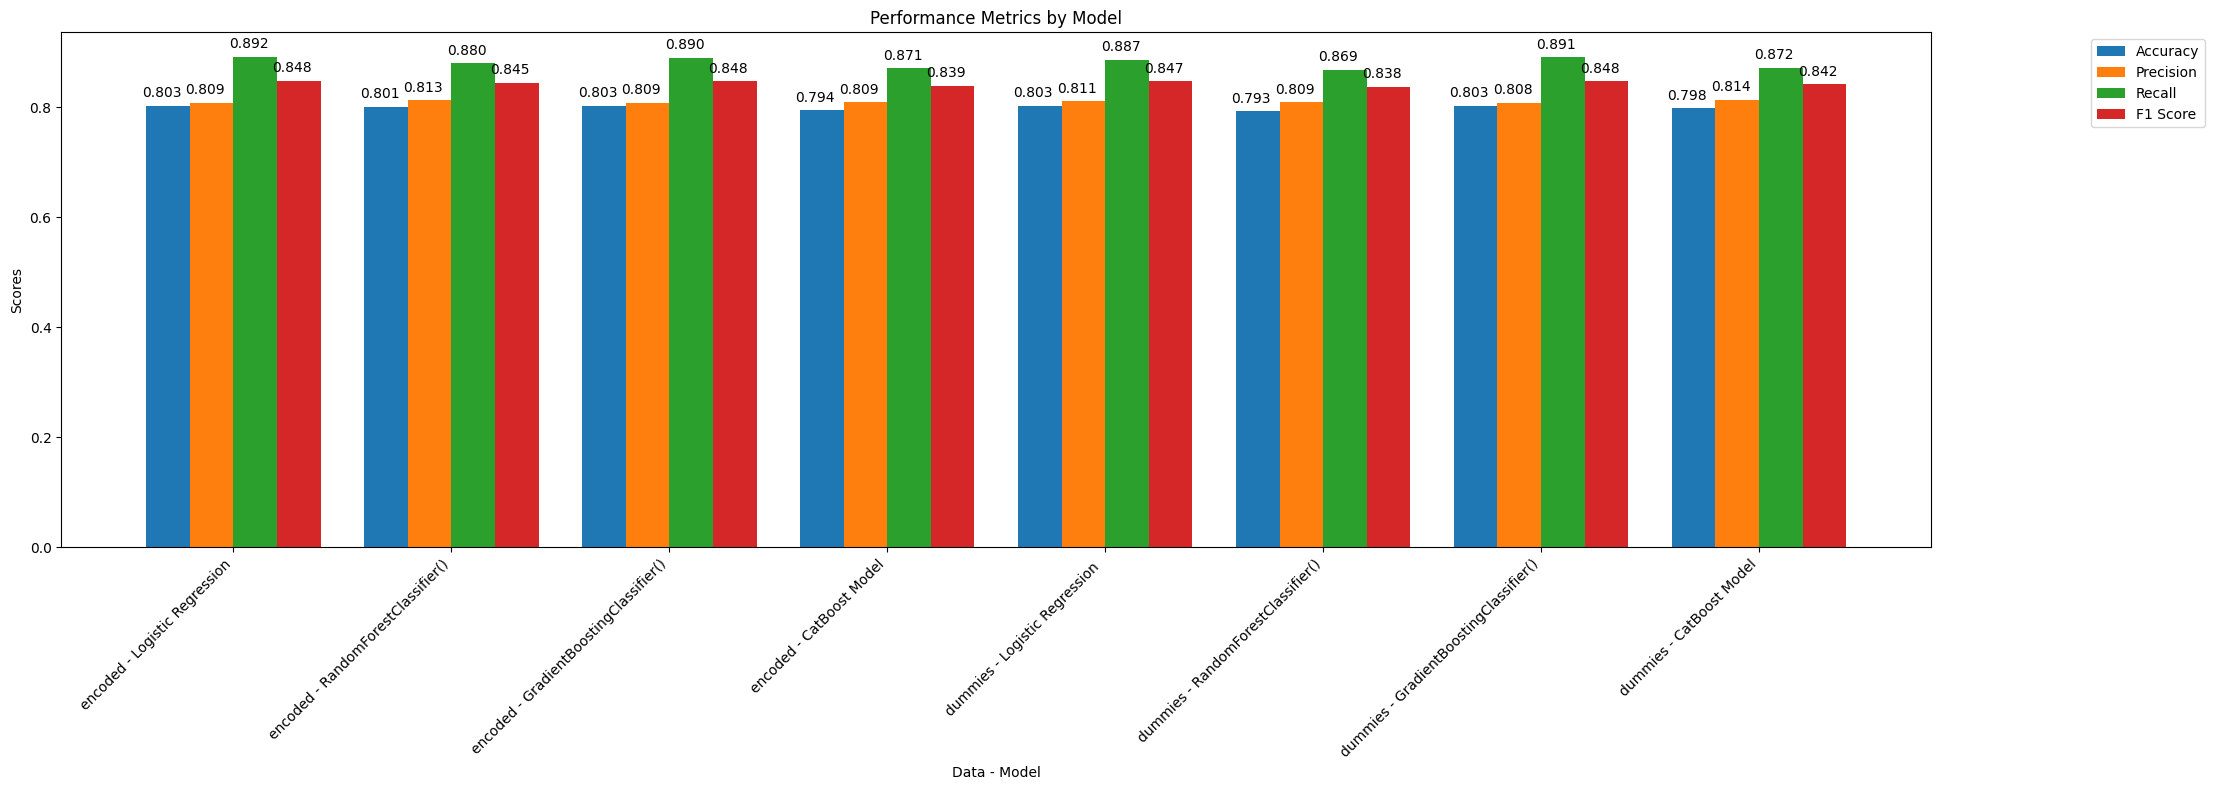

In [ ]:
# Create a grouped bar chart to visualize the results
fig, ax = plt.subplots(figsize=(22, 8))
bar_width = 0.2
index = range(len(results))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    x = [pos + i * bar_width for pos in index]
    bars = ax.bar(x, results[metric], width=bar_width, label=f'{metric}')
    for bar, value in zip(bars, results[metric]):
        ax.text(bar.get_x() + bar.get_width() / 2 - 0.03, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

# Concatenate 'Data' and 'Model' for x-axis labels
x_labels = [f'{data} - {model}' for data, model in zip(results['Data'], results['Model'])]

ax.set_xlabel('Data - Model')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks([pos + 1.5 * bar_width for pos in index])
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rotate labels for better readability
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()


In [ ]:
# List of models
models = [model_catboost, model_lg, gb_model, rf_model]

# Create an empty DataFrame to store feature importances
all_importances = pd.DataFrame(columns=['Model', 'Feature', 'Importance'])

# Iterate through each model
for model in models:

    # Extract feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # Handle feature importances for models that don't have feature_importances_ attribute
        feature_importances = model.coef_[0]

    # Normalize feature importances
    feature_importances = feature_importances / feature_importances.sum()

    # Create a DataFrame for the current model
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

    # Sort by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Add the 'Model' column
    importance_df['Model'] = str(model)

    # Append to the overall DataFrame
    all_importances = all_importances.append(importance_df, ignore_index=True)


<ipython-input-156-8d572f482290>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_importances = all_importances.append(importance_df, ignore_index=True)
<ipython-input-156-8d572f482290>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_importances = all_importances.append(importance_df, ignore_index=True)
<ipython-input-156-8d572f482290>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_importances = all_importances.append(importance_df, ignore_index=True)
<ipython-input-156-8d572f482290>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_importances = all_importances.append(importance_df, ignore_index=True)


In [ ]:
# Create an empty DataFrame to store feature importances
all_importances_onehot = pd.DataFrame(columns=['Model', 'Feature', 'Importance'])
models = [gb_model_dummies, model_lg_dummies, model_catboost_dummies, rf_model_dummies]

# List to store model names
model_names = ["GradientBoostingClassifier()", "LogisticRegression(max_iter=10000)", "<catboost.core.CatBoostClassifier object at 0x...	", "RandomForestClassifier()"]

# Iterate through each model
for model, model_name in zip(models, model_names):
    # Extract feature importances
    feature_importances = model.feature_importances_ if hasattr(model, 'feature_importances_') else abs(model.coef_[0])
    feature_names = X_train_dummies.columns

    # Non-encoded columns
    non_encoded_columns = ['height', 'Weight', 'num_of_anesthesia', 'Patient age (on the day of surgery)',
                           'hours_admitted_after_surgery', 'num_background_diseases', 'surgery_duration_minutes']

    # Categorical columns
    categorical_columns = ['site code', 'activity', 'Chief surgeon code', 'anesthetic code', 'Year', 'gender']

    # Map feature importances to original column names
    original_feature_importances = {}

    # Include importance for non-encoded columns
    for column in non_encoded_columns:
        original_feature_importances[column] = feature_importances[feature_names.get_loc(column)]

    # Aggregate importance for categorical columns
    for original_feature in categorical_columns:
        one_hot_columns = [col for col in feature_names if col.startswith(original_feature)]
        importance_sum = sum(feature_importances[feature_names.get_loc(col)] for col in one_hot_columns)
        original_feature_importances[original_feature] = importance_sum

    # Normalize feature importances
    total_importance = sum(original_feature_importances.values())
    original_feature_importances = {k: v / total_importance for k, v in original_feature_importances.items()}

    # Create DataFrame for the current model
    importance_df = pd.DataFrame(list(original_feature_importances.items()), columns=['Feature', 'Importance'])

    # Assign the model name to the 'Model' column for each feature
    importance_df['Model'] = model_name

    # Append to the overall DataFrame
    all_importances_onehot = pd.concat([all_importances_onehot, importance_df], ignore_index=True)


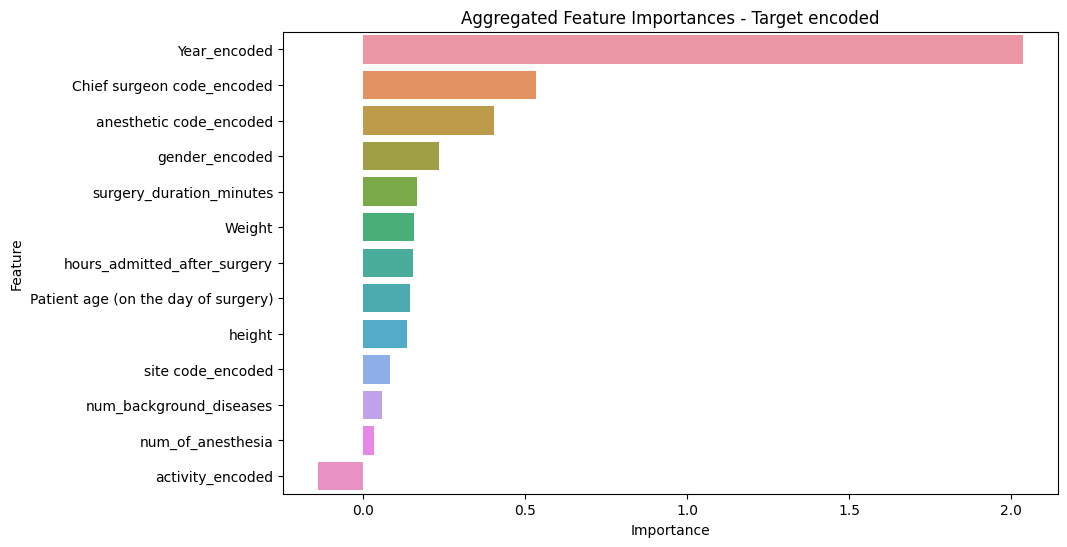

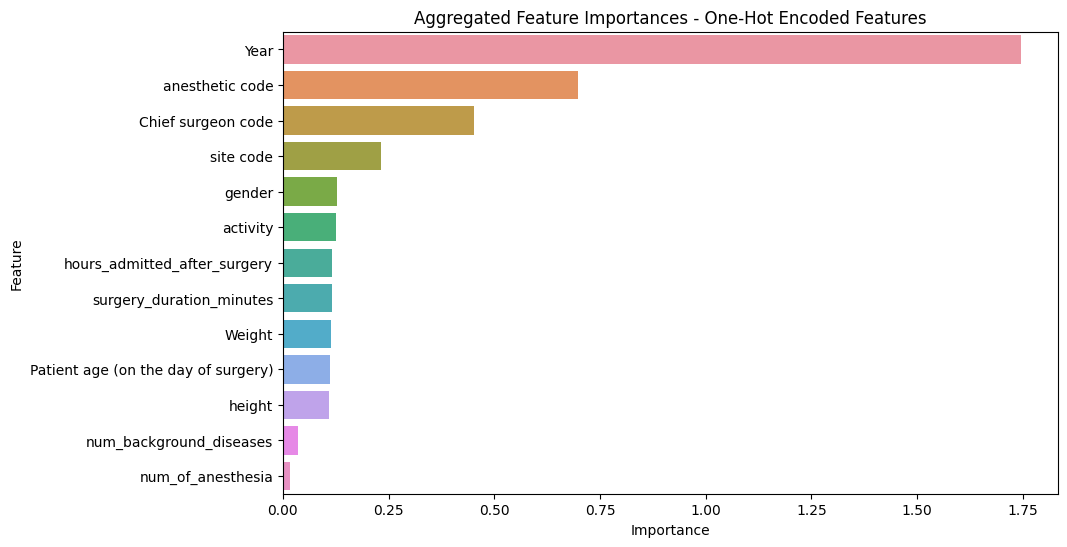

In [ ]:
# Sum the importance across different models for each feature
sum_importance_original = all_importances.groupby('Feature')['Importance'].sum().reset_index()
sum_importance_onehot = all_importances_onehot.groupby('Feature')['Importance'].sum().reset_index()

# Plot for original features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sum_importance_original.sort_values(by='Importance', ascending=False))
plt.title('Aggregated Feature Importances - Target encoded')
plt.show()

# Plot for one-hot encoded features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sum_importance_onehot.sort_values(by='Importance', ascending=False))
plt.title('Aggregated Feature Importances - One-Hot Encoded Features')
plt.show()